In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
feature_name_df = pd.read_csv('C:\\Users\\User\\allcode\\rpythoncode\\mlp\\UCI HAR Dataset\\UCI HAR Dataset/features.txt',
                              sep = '\s+', header = None, names = ['column_index', 'column_name'])

In [3]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()

In [4]:
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [5]:
feature_dup_df = feature_name_df.groupby('column_name').count()

In [6]:
feature_dup_df[feature_dup_df['column_index'] > 1].count()

column_index    42
dtype: int64

In [7]:
feature_dup_df[feature_dup_df['column_index'] > 1].head()

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [8]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                 columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df,
                                                 how = 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(
    lambda x : x[0] + '_' + str(x[1])
    if x[1] > 0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df

In [9]:
def get_human_dataset():
    feature_name_df = pd.read_csv('C:\\Users\\User\\allcode\\rpythoncode\\mlp\\UCI HAR Dataset\\UCI HAR Dataset/features.txt',
                                 sep = '\s+', header = None, names = ['column_index', 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    x_train = pd.read_csv('C:\\Users\\User\\allcode\\rpythoncode\\mlp\\UCI HAR Dataset\\UCI HAR Dataset/train/X_train.txt', sep = '\s+', names = feature_name)
    x_test = pd.read_csv('C:\\Users\\User\\allcode\\rpythoncode\\mlp\\UCI HAR Dataset\\UCI HAR Dataset/test/X_test.txt', sep = '\s+', names = feature_name)
    y_train = pd.read_csv('C:\\Users\\User\\allcode\\rpythoncode\\mlp\\UCI HAR Dataset\\UCI HAR Dataset/train/Y_train.txt', sep = '\s+', header = None, names = ['action'])
    y_test = pd.read_csv('C:\\Users\\User\\allcode\\rpythoncode\\mlp\\UCI HAR Dataset\\UCI HAR Dataset/test/Y_test.txt', sep = '\s+', header = None, names = ['action'])
    return x_train, x_test, y_train, y_test


In [10]:
x_train, x_test, y_train, y_test = get_human_dataset()

In [11]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [12]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [14]:
dt_clf = DecisionTreeClassifier(random_state = 156)

In [15]:
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)

In [16]:
print('결정 트리 예측 정확도: {0:4f}'.format(accuracy))

결정 트리 예측 정확도: 0.854768


In [17]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

In [2]:
from sklearn.model_selection import GridSearchCV

In [19]:
params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

In [20]:
grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5,
                      verbose = 1)


In [21]:
grid_cv.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__ccp_alpha', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__random_state', 'estimator__splitter', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [22]:
grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


KeyboardInterrupt: 

In [ ]:
grid_cv.best_score_

In [ ]:
grid_cv.best_params_

In [ ]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

In [ ]:
cv_results_df[['param_max_depth', 'mean_test_score']]

In [ ]:
best_dt_clf = grid_cv.best_estimator_

In [ ]:
pred1 = best_dt_clf.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, pred1)

In [ ]:
accuracy

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [24]:
x_train, x_test, y_train, y_test = get_human_dataset()

In [25]:
rt_clf = RandomForestClassifier(random_state = 0)
rt_clf.fit(x_train, y_train)
pred = rt_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)

In [26]:
accuracy

0.9253478113335596

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
params = {
    'n_estimators' : [100],
    'max_depth' : [6, 8 ,10, 12],
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}

In [29]:
rt_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rt_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [30]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [31]:
grid_cv.best_score_

0.9179815016322089

In [32]:
rt_clf1 = RandomForestClassifier(n_estimators = 300, max_depth = 10, min_samples_leaf = 8, min_samples_split = 8, random_state = 0)

In [33]:
rt_clf1.fit(x_train, y_train)
pred = rt_clf1.predict(x_test)

In [34]:
accuracy_score(y_test, pred)

0.9165252799457075

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
ftr_importances_values = rt_clf1.feature_importances_

In [37]:
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)

In [38]:
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

<AxesSubplot:title={'center':'feature importances top 20'}>

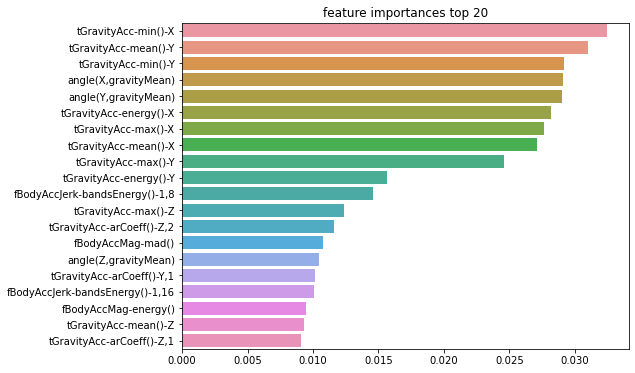

In [39]:
plt.figure(figsize = (8,6))
plt.title('feature importances top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

In [49]:
x_train, x_test, y_train, y_test = get_human_dataset()

In [50]:
start_time = time.time()

In [51]:
gb_clf = GradientBoostingClassifier(random_state = 0)

In [46]:
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

KeyboardInterrupt: 

In [53]:
gb_accuracy

0.9389209365456397

In [54]:
time.time() - start_time

492.4887640476227

In [52]:
gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

In [6]:
import xgboost as xgb

In [7]:
from xgboost import XGBClassifier